In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import nibabel
import neurods

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [11]:
nii = nibabel.load('/Users/mark/Dropbox/data8/mystery_data/mystery_brain_01.nii.gz')
brain = nii.get_data()
brain.shape

(200, 512, 170)

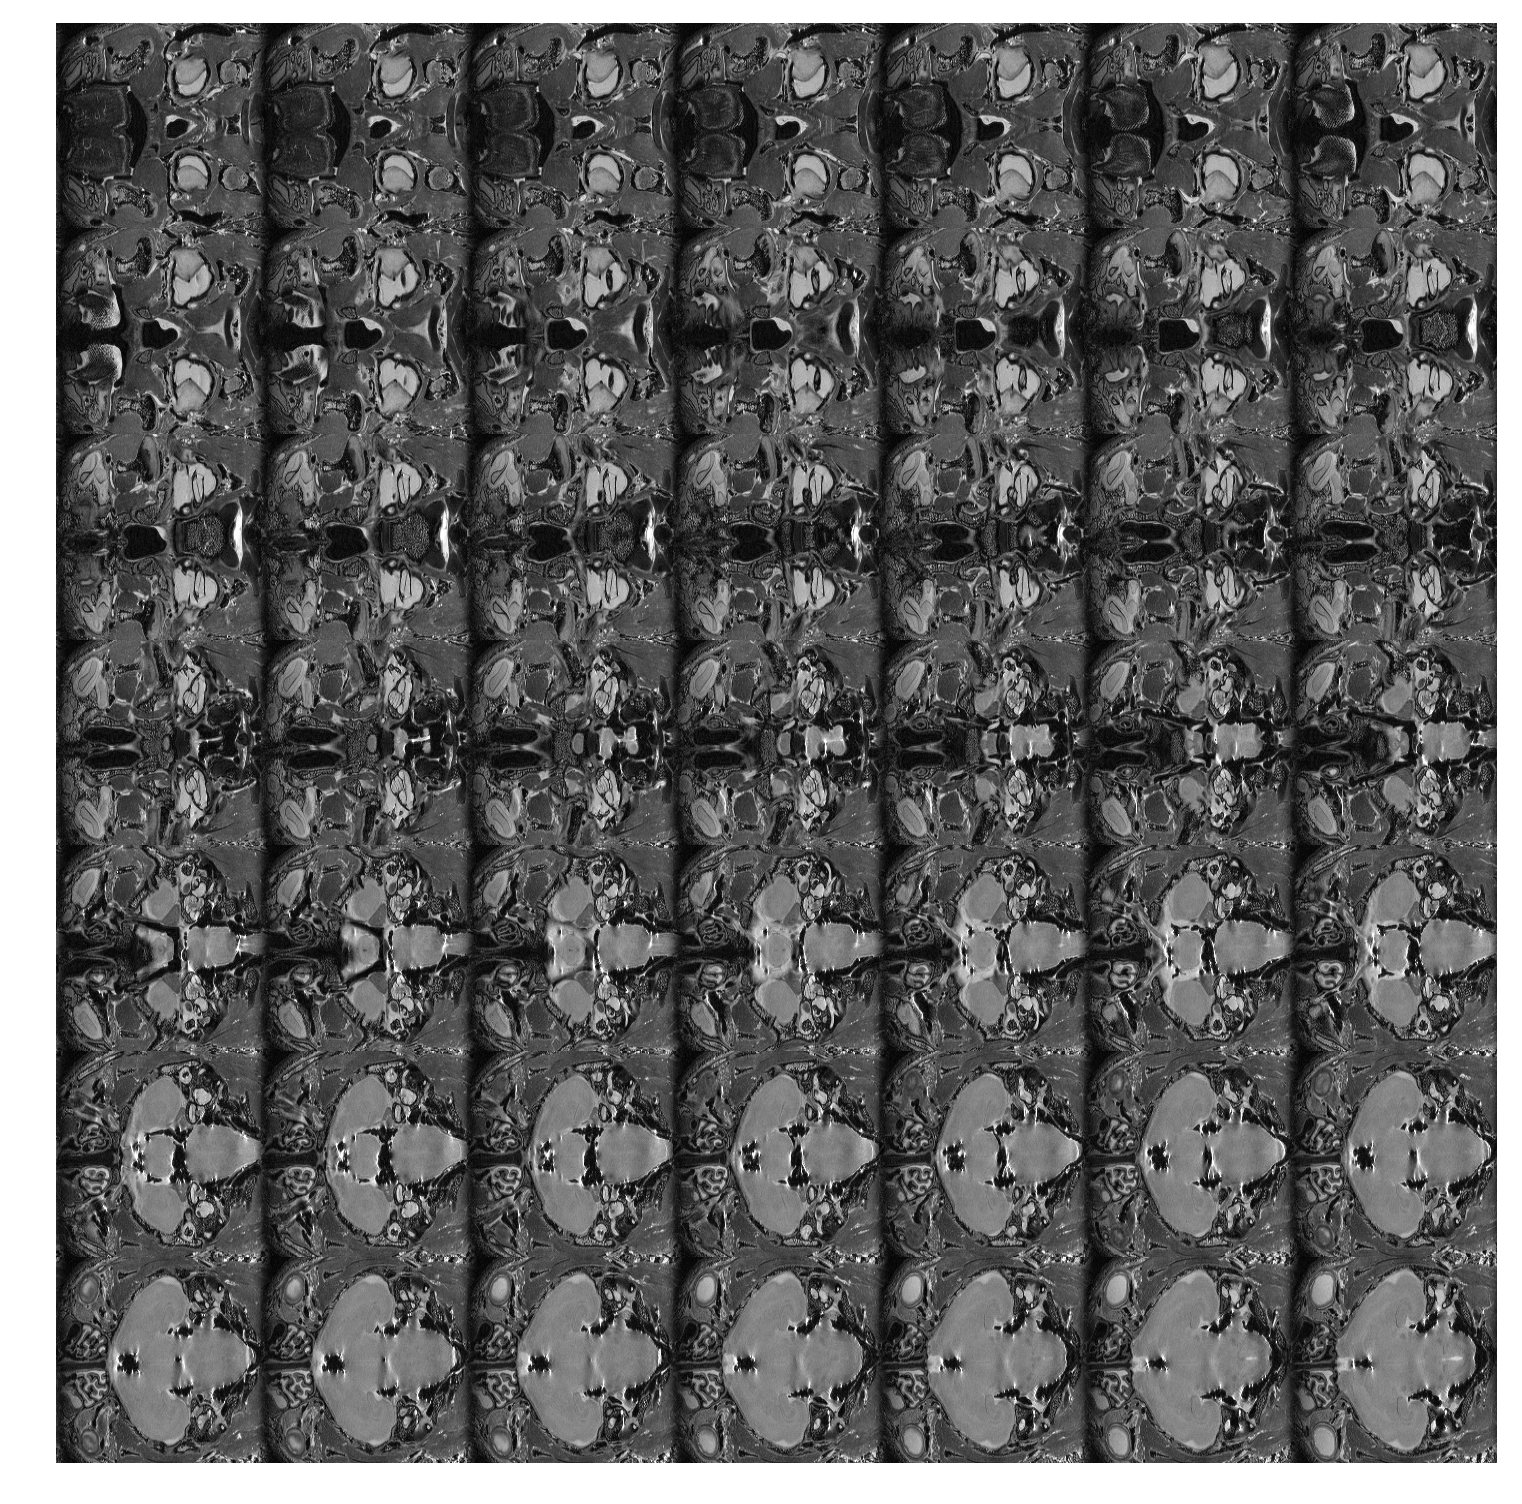

In [16]:
fig = plt.figure(figsize=(10,10))
_ = neurods.viz.slice_3d_array(brain[...,:49], axis=2, cmap='gray', fig=fig,
                              vmin=0, vmax=10000, aspect='auto')

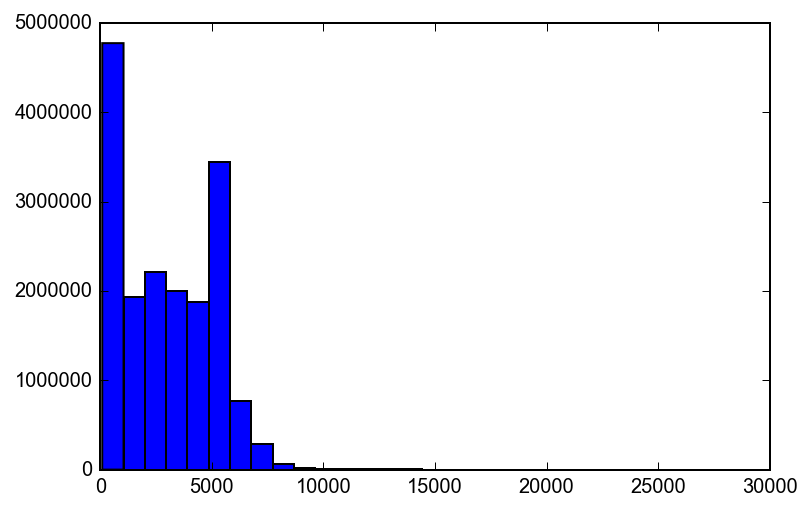

In [22]:
_ = plt.hist(brain.flatten(), 31)

In [21]:
brain.shape

(200, 512, 170)

In [ ]:
fig = plt.figure(figsize=(12,6))
_ = neurods.viz.slice_3d_array(brain[..., 85-24:85+24], axis=2, cmap='gray', fig=fig,
                              vmin=0, vmax=10000, aspect='equal')

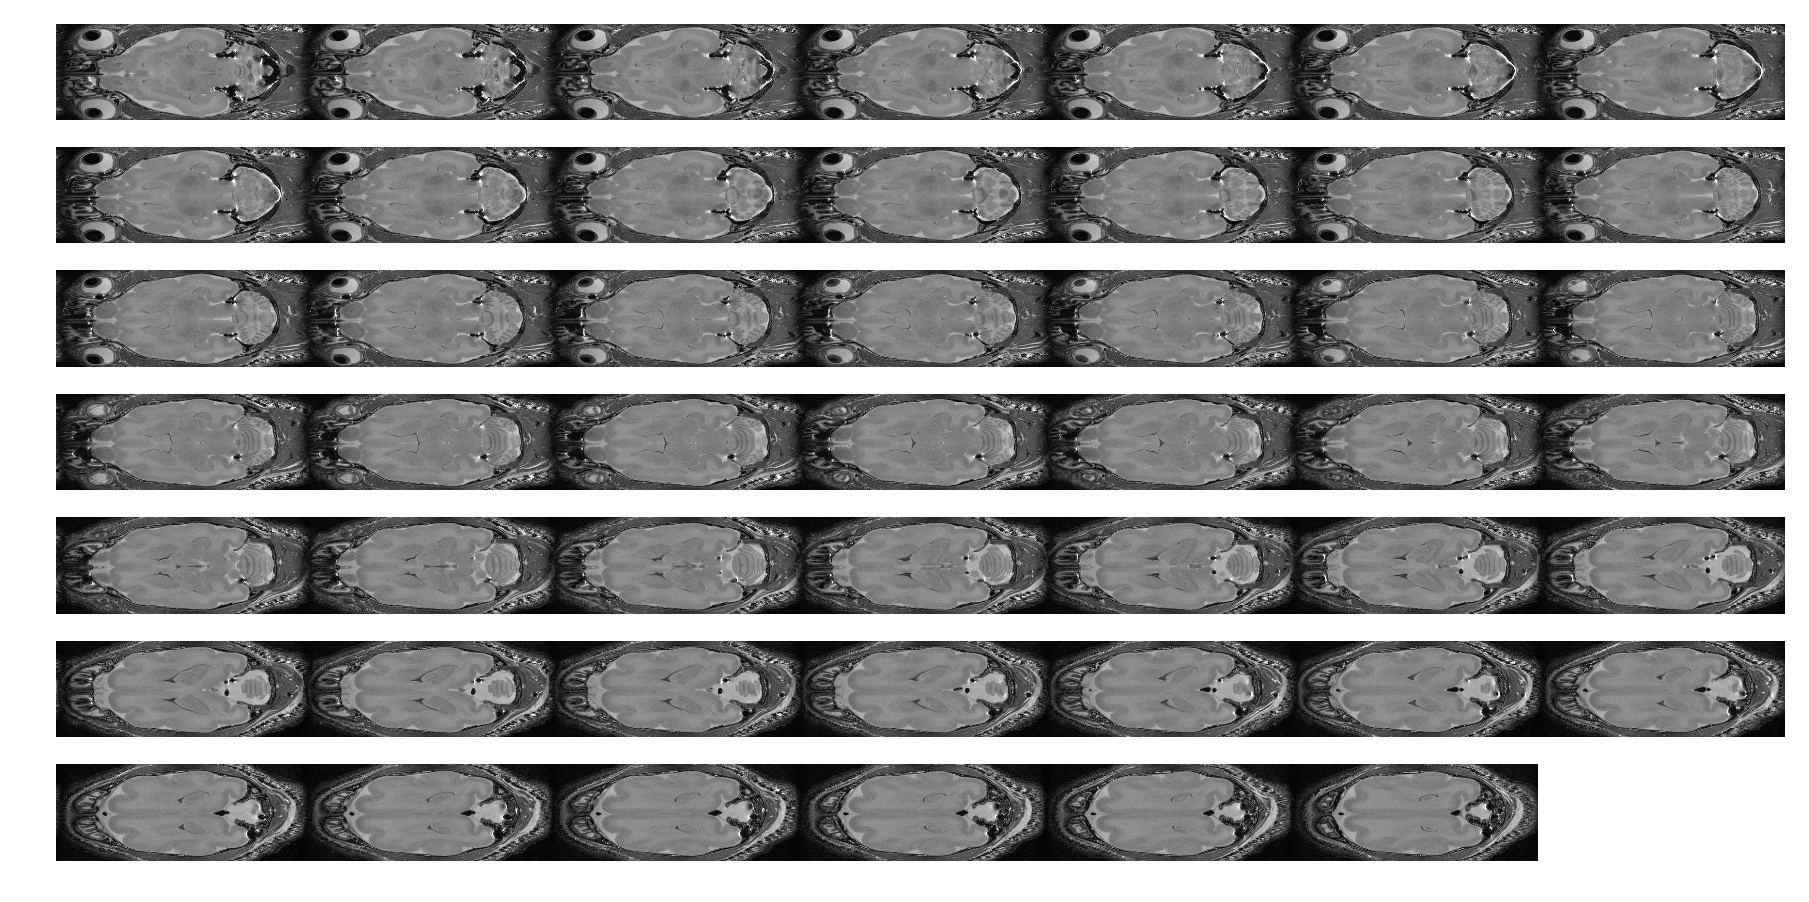

In [20]:
fig = plt.figure(figsize=(12,6))
_ = neurods.viz.slice_3d_array(brain[..., 85-24:85+24], axis=2, cmap='gray', fig=fig,
                              vmin=0, vmax=10000, aspect='equal')

# Graphs

In [56]:
t = np.arange(0,25*2, 2)-4
stim = np.zeros((25,))
stim[2] = 1
simple_on_1 = np.zeros((25,))
simple_on_1[2:7] = 1
def quickplot(t, stim, resp, sname=None):
    fig = plt.figure()
    plt.stem(t, stim, 'k-', basefmt='k-', markerfmt='k.', label='Stimulus')
    plt.plot(t, resp, 'r.-', label='BOLD response')
    plt.xlim([-5,25])
    plt.ylim([-0.2, 1.2])
    plt.grid('on')
    plt.ylabel('Response', fontsize=16)
    plt.xlabel('Time (seconds)', fontsize=16)
    plt.legend(loc='upper right', frameon=False)
    if sname is not None:
        fig.savefig(sname, dpi=100)

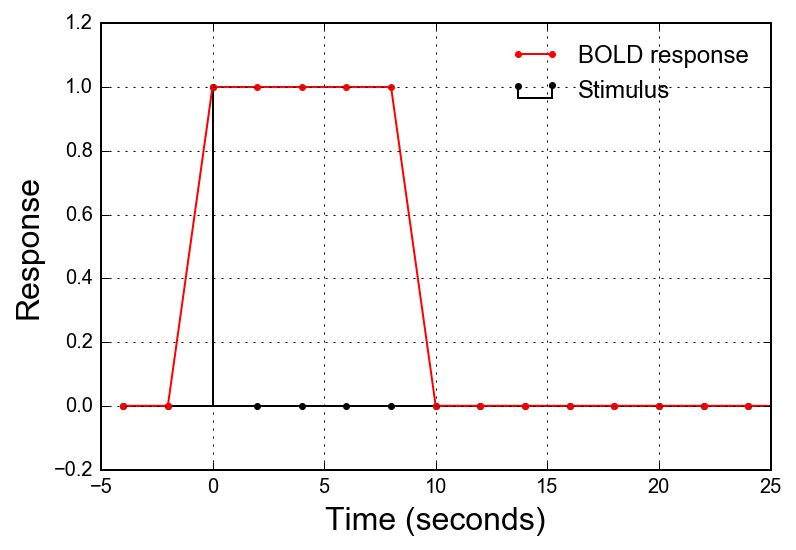

In [97]:
quickplot(t, stim, simple_on_1, sname='plots_option1.png')

In [60]:
neurods.fmri.hrf?

In [67]:
hrf

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])

In [68]:
hrf_t, hrf = neurods.fmri.hrf(tr=2, )
hrf

array([ 0.        ,  0.00735876,  0.24200351,  0.42112592,  0.30524441,
        0.13799424,  0.03246085, -0.01860823, -0.03633425, -0.0350783 ,
       -0.02574436, -0.01574089, -0.00835773, -0.0039543 , -0.00169823,
       -0.00067142])

In [69]:
resp_hrf = np.convolve(stim, hrf, mode='full')[:len(stim)]

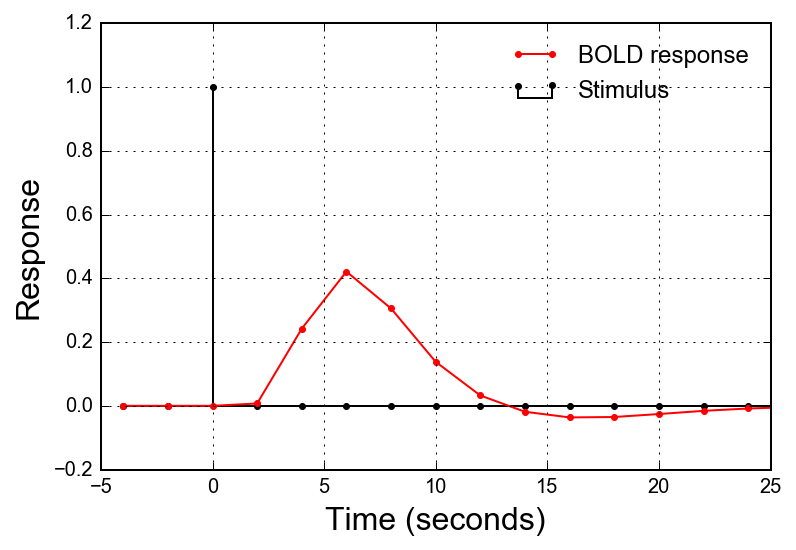

In [98]:
quickplot(t, stim, resp_hrf, sname='plots_option2.png')

In [82]:
t

array([-4, -2,  0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28,
       30, 32, 34, 36, 38, 40, 42, 44])

In [87]:
gg = np.exp(-(t-10)**2/16.)
gg /= gg.sum()

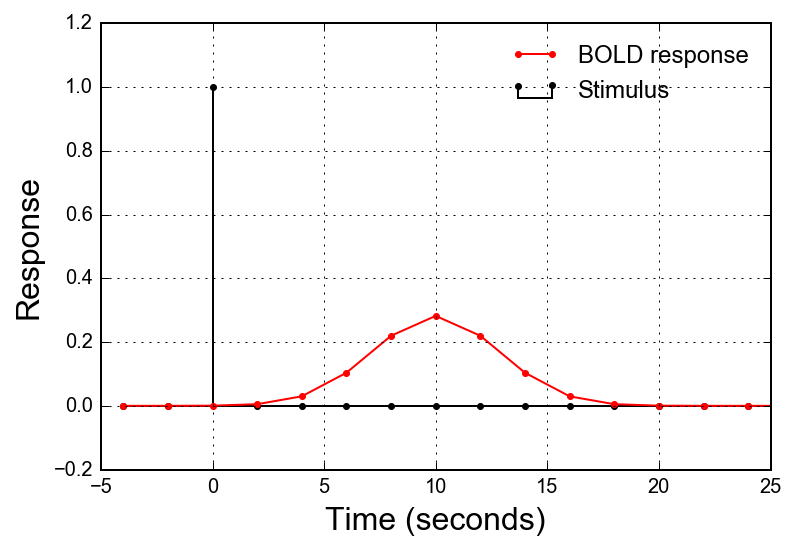

In [99]:
quickplot(t, stim, gg, sname='plots_option3.png')

In [92]:
1/x**0.5

array([        inf,         inf,         inf,  1.        ,  0.70710678,
        0.57735027,  0.5       ,  0.4472136 ,  0.40824829,  0.37796447,
        0.35355339,  0.33333333,  0.31622777,  0.30151134,  0.28867513,
        0.2773501 ,  0.26726124,  0.25819889,  0.25      ,  0.24253563,
        0.23570226,  0.22941573,  0.2236068 ,  0.21821789,  0.21320072])

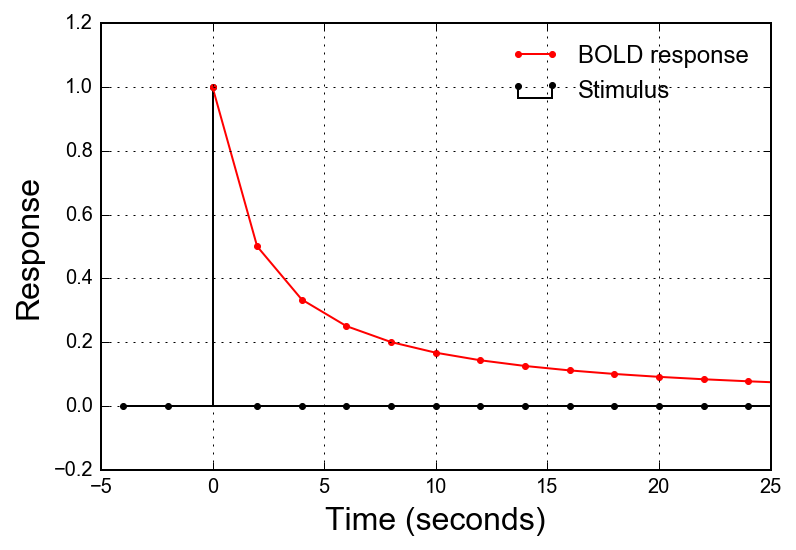

In [100]:
x = np.hstack([[0],np.arange(24)])
y = 1/x
quickplot(t, stim, y, sname='plots_option4.png')